In [1]:
%cd ..

/Users/jorgensandhaug/Documents/github_documents/option_pricing_framework


### This is a test to see how control variates affect the variance of estimated prices and convergence of monte carlo for arithmetic asian options 

In [2]:
from models.exotic.asian import AsianOptionSimulationModel, AnalyticalGeometricAsianOptionPricingModel
from simulations.geometric_brownian_motion import GeometricBrownianMotion

In [3]:
params = {
    'initial_stock_price': 40,
    'strike_price': 40,
    'volatility': 0.3,
    'risk_free_rate': 0.08,
    'time_to_maturity': 1,
    'dividend_yield': 0.0,
    'asian_type': 'price',
    'option_type': 'call'
}

In [4]:
gp = AnalyticalGeometricAsianOptionPricingModel()
gp.price({**params, 'time_steps': 12})

3.182467926823456

In [20]:
simulation_params = {
    **params,
    'time_steps': 12,
    'simulation_paths': 200
}
gbm = GeometricBrownianMotion()
asian_pricer = AsianOptionSimulationModel(gbm)

num_valuations = 100
valuations = []
for i in range(num_valuations):
    val = asian_pricer.price({**params, 'average_type': "arithmetic"}, simulation_params)
    valuations.append(val)


valuations_with_control_variate = []
for i in range(num_valuations):
    val = asian_pricer.arithmetic_price_geometric_control_variate(params, simulation_params)
    valuations_with_control_variate.append(val)



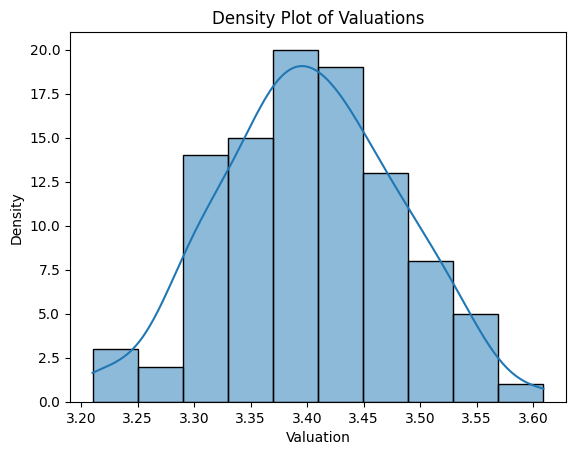

Mean: 3.401425739968426
Standard Deviation: 0.07766280434721812


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting the histogram density plot
sns.histplot(valuations, kde=True)

plt.title('Density Plot of Valuations')
plt.xlabel('Valuation')
plt.ylabel('Density')

plt.show()

# Print mean and standard deviation of valuations
print(f"Mean: {np.mean(valuations)}")
print(f"Standard Deviation: {np.std(valuations)}")

# With the control variate for variance reduction

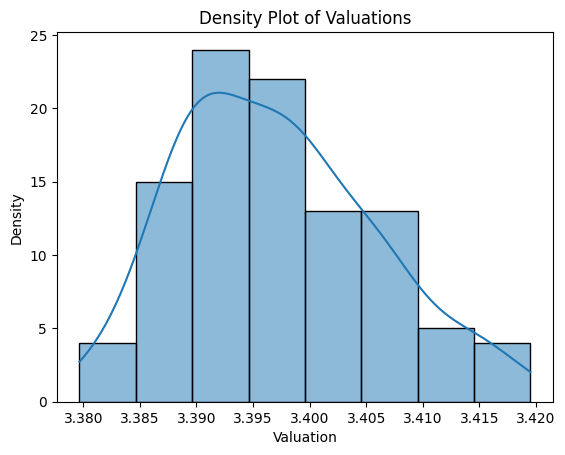

Mean: 3.3970802370879962
Standard Deviation: 0.008606436111849006


In [22]:
# Plotting the histogram density plot
sns.histplot(valuations_with_control_variate, kde=True)

plt.title('Density Plot of Valuations')
plt.xlabel('Valuation')
plt.ylabel('Density')

plt.show()

# Print mean and standard deviation of valuations
print(f"Mean: {np.mean(valuations_with_control_variate)}")
print(f"Standard Deviation: {np.std(valuations_with_control_variate)}")

#### We can clearly see a huge reduction in variance (nearly 10x). Because we are also using sobol quasi random numbers, the convergence is very fast. We get a very accurate value even with just 200 simulations!!